# Import Libraries

In [2]:
%pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 7.0 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.6 MB 7.4 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.6 MB 8.7 MB/s eta 0:00:01
   ---------------------------- ----------- 6.8/9.6 MB 9.3 MB/s eta 0:00:01
   ------------------------------------- -- 8.9/9.6 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 9.3 MB/s  0:00:01

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmod

# Load Dataset

In [4]:
# Example dataset: monthly_sales.csv (should have 'Date' and 'Sales' columns)
data = pd.read_csv("monthly_sales.csv", parse_dates=["date"], index_col="date")

print("✅ Dataset loaded!")
print(data.head())


✅ Dataset loaded!
               sales
date                
2013-01-01  14236.90
2013-02-01   4519.89
2013-03-01  55691.01
2013-04-01  28295.35
2013-05-01  23648.29


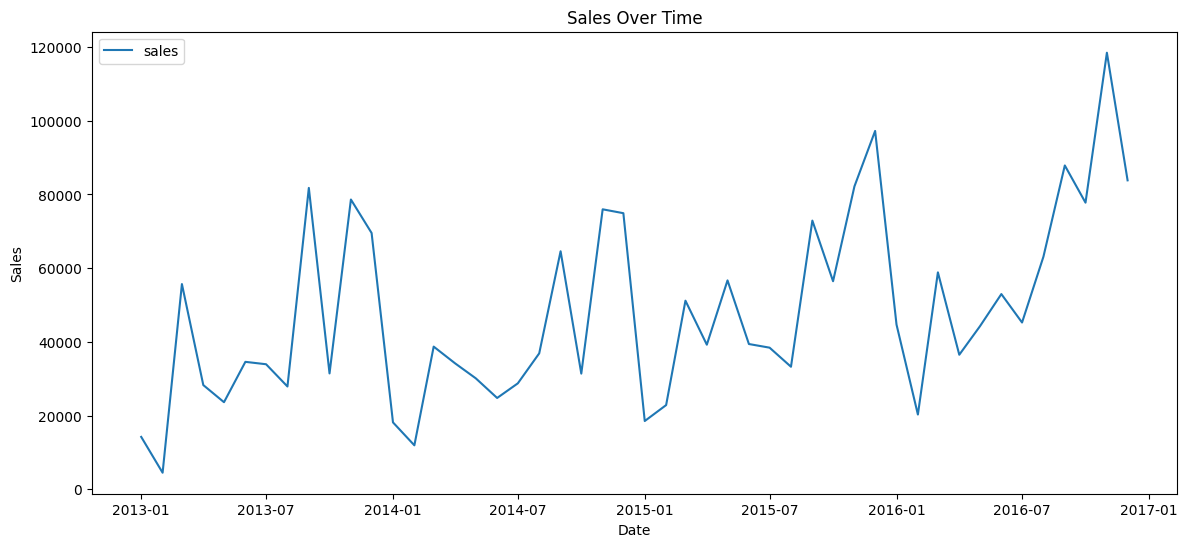

In [13]:
plt.figure(figsize=(14,6))
plt.plot(data.index, data["sales"], label="sales")
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data["sales"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -4.48146682279317
p-value: -4.48146682279317


In [20]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

print("Train size:", train.shape, "Test size:", test.shape)


Train size: (38, 1) Test size: (10, 1)


# Forecasting Models : Holt-Winters Exponential Smoothing

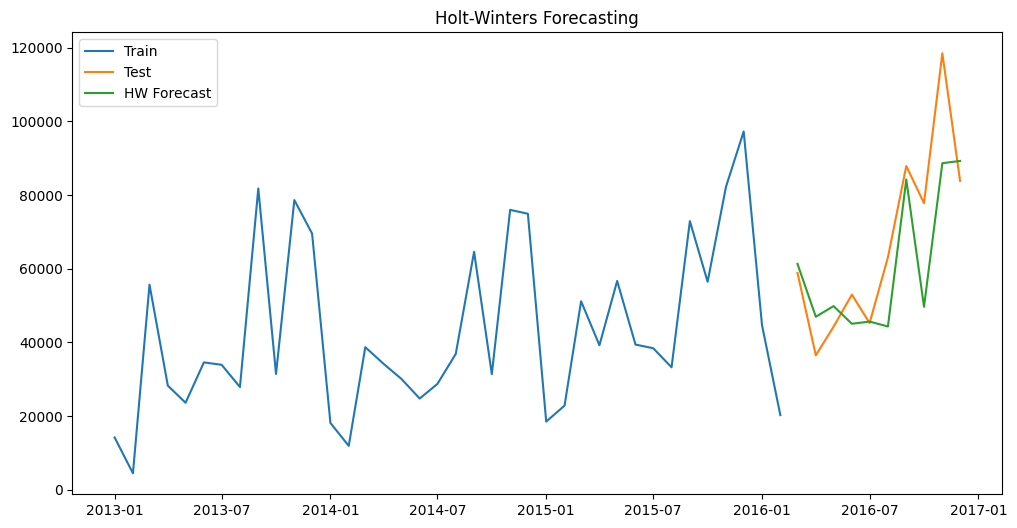

In [23]:
hw_model = ExponentialSmoothing(train["sales"], seasonal="add", seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(len(test))

plt.figure(figsize=(12,6))
plt.plot(train.index, train["sales"], label="Train")
plt.plot(test.index, test["sales"], label="Test")
plt.plot(test.index, hw_forecast, label="HW Forecast")
plt.title("Holt-Winters Forecasting")
plt.legend()
plt.show()


# SARIMA

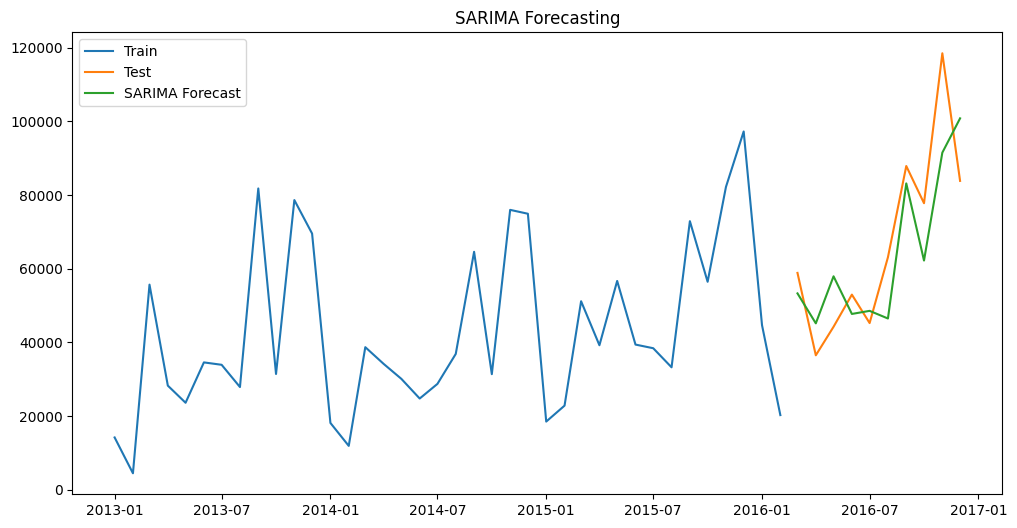

In [24]:
sarima_model = SARIMAX(train["sales"], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit(disp=False)
sarima_forecast = sarima_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

plt.figure(figsize=(12,6))
plt.plot(train.index, train["sales"], label="Train")
plt.plot(test.index, test["sales"], label="Test")
plt.plot(test.index, sarima_forecast, label="SARIMA Forecast")
plt.title("SARIMA Forecasting")
plt.legend()
plt.show()


# Evaluate Models


In [26]:
def evaluate_forecast(actual, predicted, model_name):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    print(f"{model_name} → MAE: {mae:.2f}, RMSE: {rmse:.2f}")

evaluate_forecast(test["sales"], hw_forecast, "Holt-Winters")
evaluate_forecast(test["sales"], sarima_forecast, "SARIMA")


Holt-Winters → MAE: 11260.53, RMSE: 15110.67
SARIMA → MAE: 11727.33, RMSE: 13734.64


# Future Forecast (Bonus) 

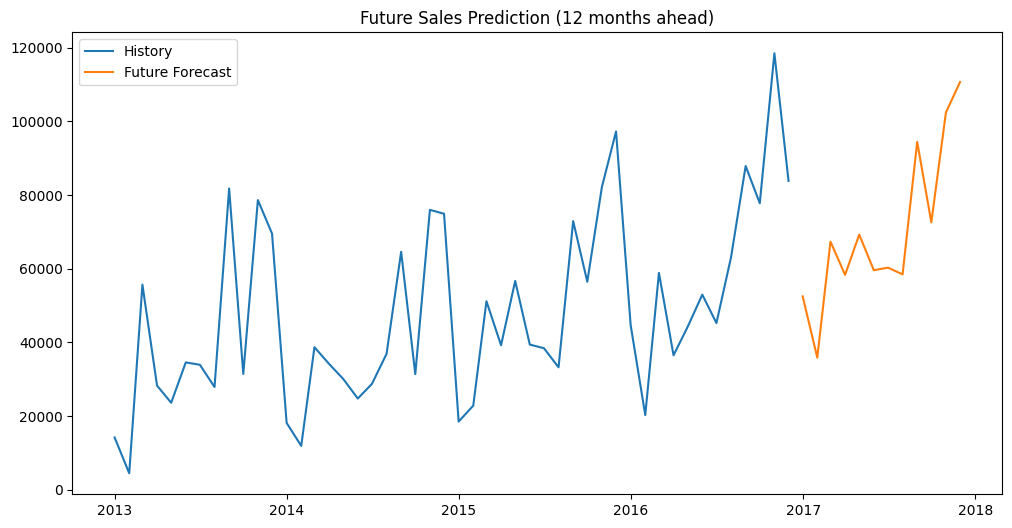

In [28]:
# Extend model to future (next 12 months)
future_forecast = sarima_fit.predict(start=len(data), end=len(data)+11, dynamic=False)

plt.figure(figsize=(12,6))
plt.plot(data.index, data["sales"], label="History")
plt.plot(pd.date_range(start=data.index[-1], periods=12, freq="M"), future_forecast, label="Future Forecast")
plt.title("Future Sales Prediction (12 months ahead)")
plt.legend()
plt.show()
